In [1]:
%matplotlib inline

import sys
import math

import geopandas as gpd

sys.path.insert(0, "../")
from weavingspace.tile_unit import TileUnit
from weavingspace.tile_map import Tiling
from weavingspace import tiling_utils

In [2]:
ak = gpd.read_file("data/imd-auckland-2018.gpkg")

# Scratch pad
A barebones notebook for testing basic operations of the package. The above code loads necessary libraries and allows for making a map.

<Axes: >

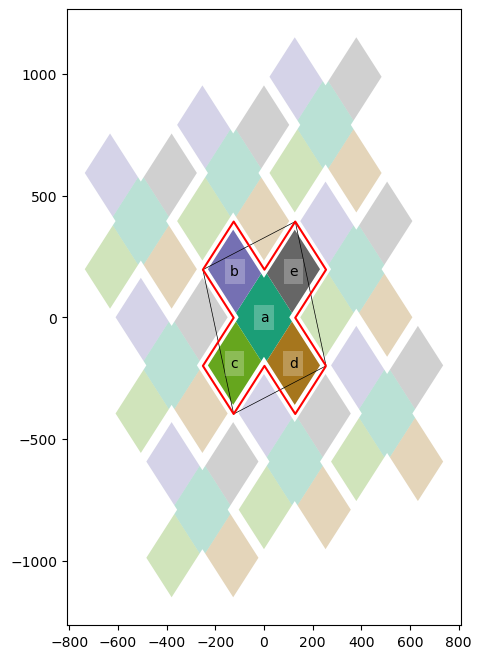

In [19]:
tile = TileUnit(tiling_type="square-colouring", 
                code="3.3.4.3.4", 
                spacing=500, 
                n=5, 
                crs=ak.crs) \
                  .inset_prototile(20).inset_tiles(0) \
                  .transform_rotate(math.atan2(2,1)*180/math.pi + 45).transform_skew(0, 0).transform_scale(0.8, 1.25)
tile.plot(r=1)


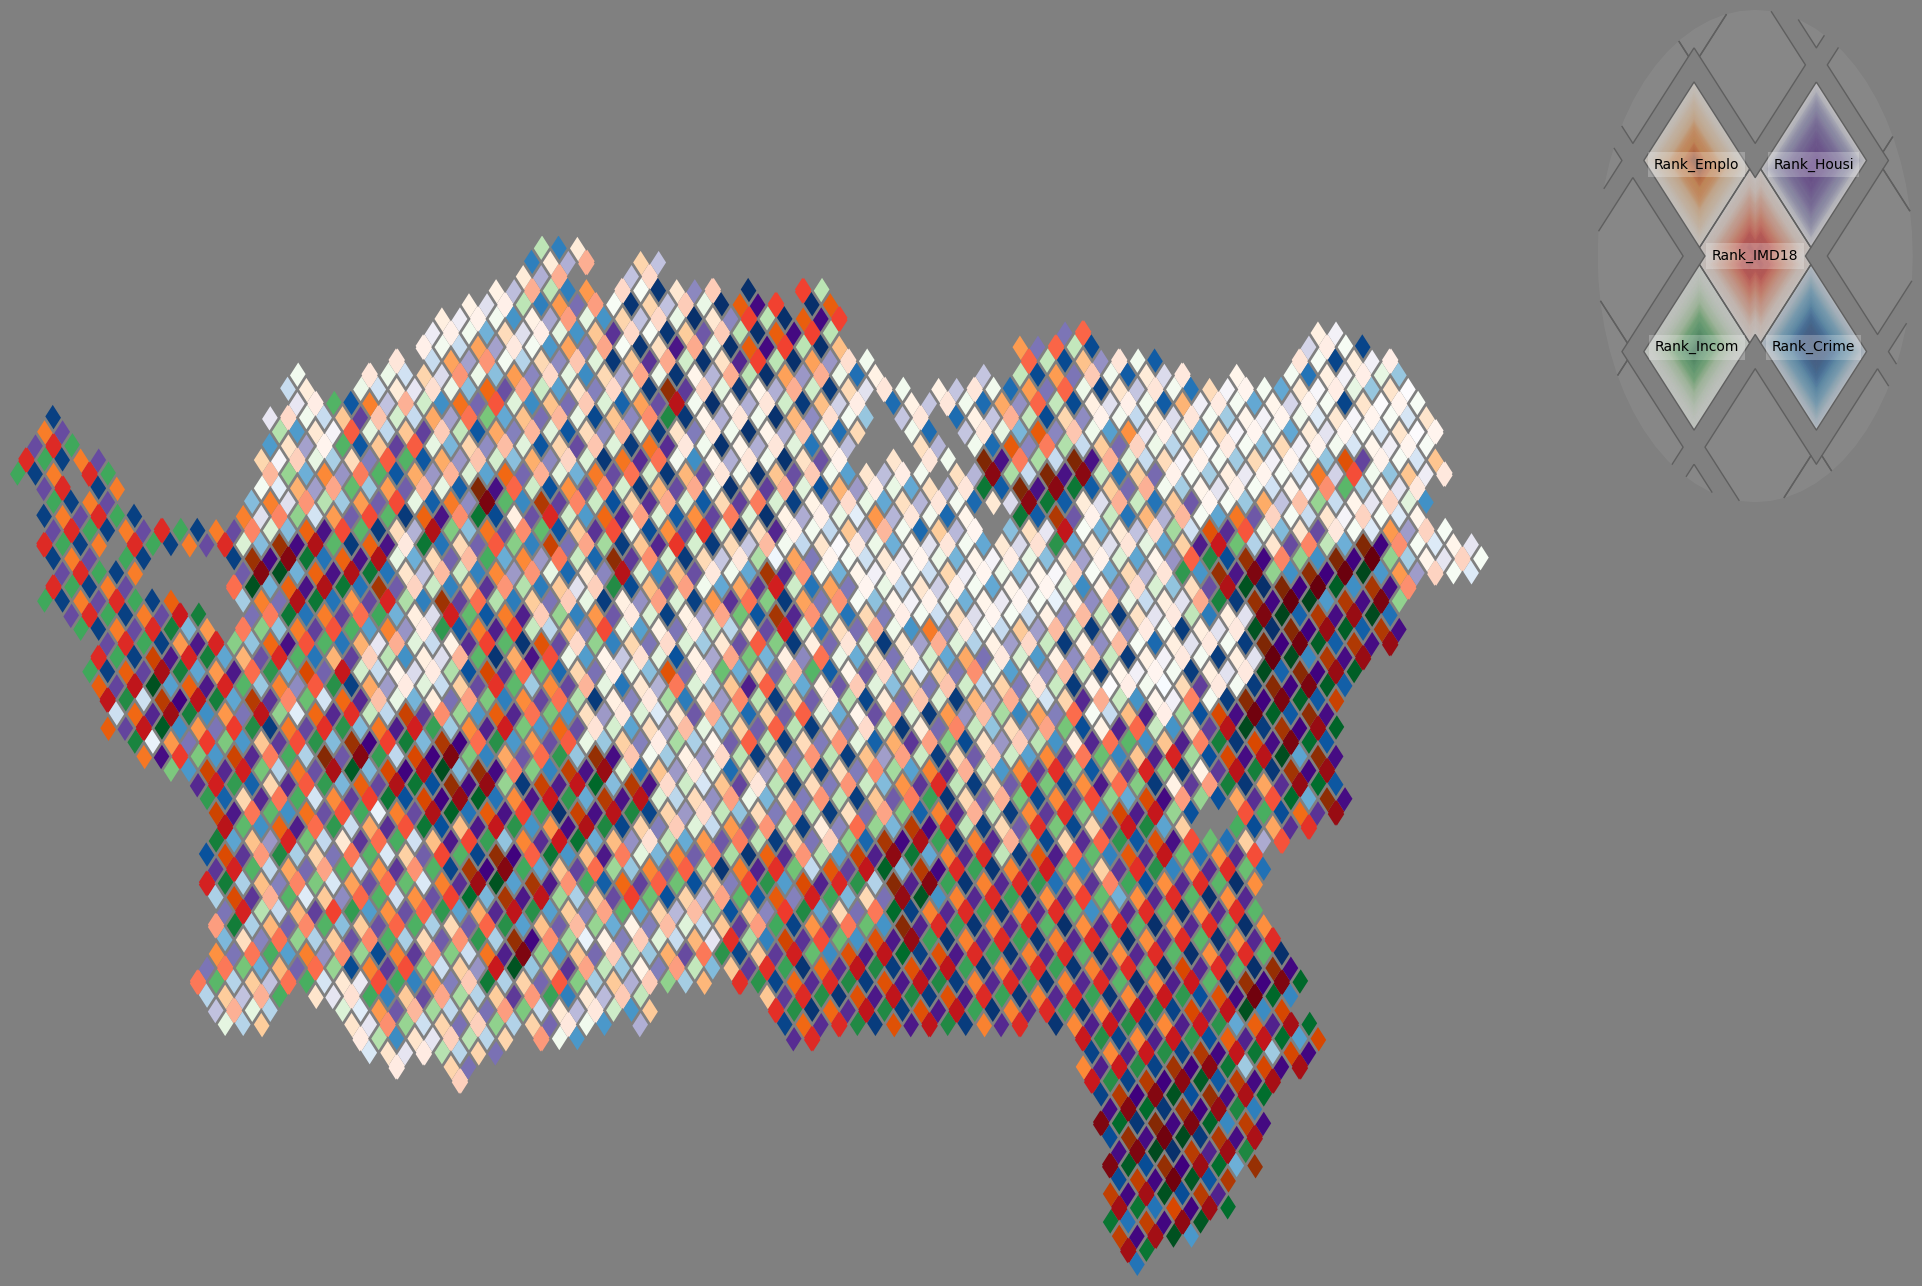

In [20]:
n = tile.tiles.shape[0]
vars = dict(zip(list("abcdefghijkl")[:n], [x for x in ak.columns if "Rank" in x][:n]))
cmaps = dict(zip(vars.values(), ["Reds", "Oranges", "Greens", "Blues", 
                                 "Purples", "Greys", "YlOrBr", "PuRd", 
                                 "YlOrRd", "BuGn", "BuPu", "YlGnBu" ][:n]))
tiling = Tiling(tile, ak)
map = tiling.get_tiled_map()
fig = map.render(variables=vars, colourmaps=cmaps, use_ellipse=True).set_facecolor("grey")